In [117]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, ArtistAnimation
import tensorflow as tf
from tensorflow import keras

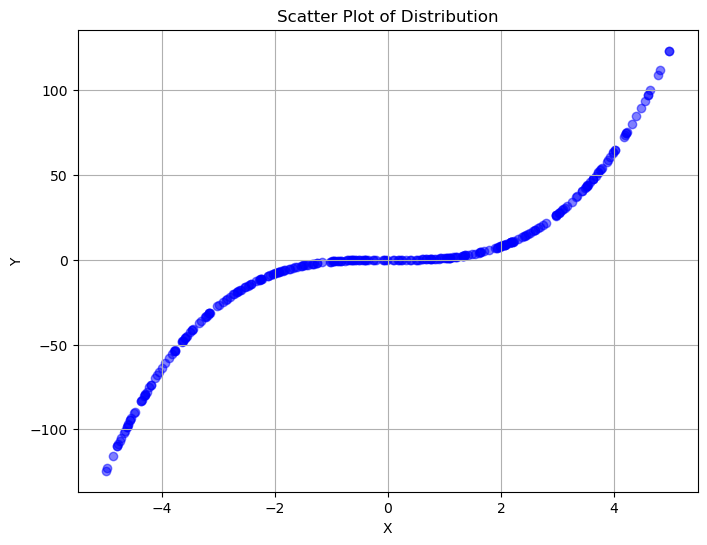

In [255]:
mean, std_dev = 0, 1
num_points = [300,1]
x_data = np.random.uniform(-5, 5, num_points)
y_data = x_data**3#np.exp(-(x_data**2))

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [262]:
X_train = x_data[0:250]
y_train = y_data[0:250]
X_val = x_data[250:]
y_val = y_data[250:]
tf.config.run_functions_eagerly(True)

In [272]:
class ShallowNN(keras.Model):
    def __init__(self):
        super().__init__()
        self.d1 = keras.layers.Dense(128, activation='relu')
        self.d2 = keras.layers.Dense(256, activation='relu')
        self.d3 = keras.layers.Dense(1)
        self.frames = []
    def call(self, inputs):
        x = self.d1(inputs)
        x = self.d2(x)
        x = self.d3(x)
        return x
    def train_step(self, data):
        x, y = data
        #tf.print("input:   ", tf.shape(x))
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = self.compute_loss(y=y, y_pred=y_pred)
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        y_pred1 = self(x_data[200:], training=True)
        self.frames.append(y_pred1)
        #tf.print(y_pred1.numpy())
        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(y, y_pred)
        
        return {m.name: m.result() for m in self.metrics}
    def get_frames(self):
        [tf.print(i) for i in frames]



In [273]:

model = ShallowNN()
optimizer = keras.optimizers.RMSprop(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss=['mse'], metrics=['mse'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, verbose=1)

Epoch 1/50
 5/32 [===>..........................] - ETA: 0s - loss: 2943.6650

D:\anaconda\envs\tf\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


32/32 [==============================] - 1s 18ms/step - loss: 1902.9490 - val_loss: 1666.9625 - val_mse: 1666.9625
Epoch 2/50
32/32 [==============================] - 1s 18ms/step - loss: 1803.3698 - mse: 1807.0863 - val_loss: 1587.4286 - val_mse: 1587.4286
Epoch 3/50
32/32 [==============================] - 1s 18ms/step - loss: 1709.6177 - mse: 1714.0905 - val_loss: 1499.7681 - val_mse: 1499.7681
Epoch 4/50
32/32 [==============================] - 1s 18ms/step - loss: 1617.0537 - mse: 1619.2960 - val_loss: 1406.0128 - val_mse: 1406.0128
Epoch 5/50
32/32 [==============================] - 1s 18ms/step - loss: 1510.0620 - mse: 1513.3274 - val_loss: 1310.7974 - val_mse: 1310.7974
Epoch 6/50
32/32 [==============================] - 1s 19ms/step - loss: 1401.0587 - mse: 1404.7805 - val_loss: 1207.4882 - val_mse: 1207.4882
Epoch 7/50
32/32 [==============================] - 1s 20ms/step - loss: 1290.7306 - mse: 1292.8630 - val_loss: 1101.5062 - val_mse: 1101.5062
Epoch 8/50
32/32 [=========

In [274]:
frames_raw = model.frames

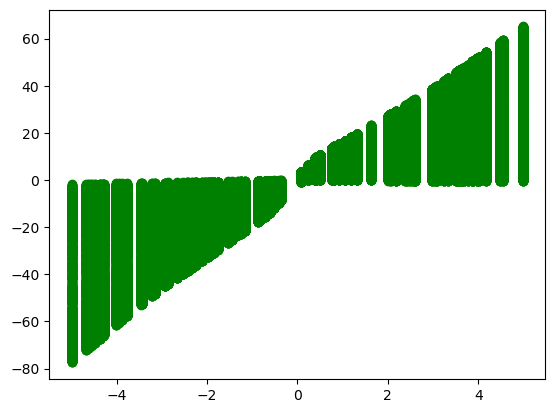

In [275]:
frames = []
fig, ax = plt.subplots()
for frame in frames_raw:
    line = ax.scatter(x_data[200:], frame.numpy(), color='g')
    frames.append([line])

In [271]:
ani = ArtistAnimation(fig, frames, interval=25)
ani.save('animation.gif', writer='pillow')